<a href="https://colab.research.google.com/github/skyil7/SejongUniv_AI/blob/master/9.%EB%AA%A8%EB%8D%B8%EC%9D%98%20%ED%81%B4%EB%9E%98%EC%8A%A4%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision.datasets as data
import torchvision.transforms as transforms
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
mnist_train = data.MNIST(root='data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
mnist_test = data.MNIST(root='data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [6]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                         batch_size=100,
                         shuffle=True,
                         drop_last=True) # Drop Last Batch

# DNN 모델의 클래스화
- `torch.nn.Module`을 상속하여 모델 클래스 생성
- `forward` 함수 오버라이드

In [9]:
class DNN(torch.nn.Module):
  def __init__(self):
    super(DNN,self).__init__() # 이부분 빼먹기 쉬운데 조심할 것

    # 주의) self 빼먹지 말자!
    self.linear1 = torch.nn.Linear((28*28),512,bias=True)
    self.linear2 = torch.nn.Linear(512,10,bias=True)
    self.relu = torch.nn.ReLU()

    torch.nn.init.xavier_uniform_(self.linear1.weight)
    torch.nn.init.xavier_uniform_(self.linear2.weight)

  def forward(self,x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    return out


In [12]:
model = DNN().to(device)
cost = torch.nn.CrossEntropyLoss().to(device) # Built in Softmax Function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [13]:
epochs = 20
total_batch = len(data_loader)
for epoch in range(1, epochs+1):
    avg_cost = 0

    for x, y in data_loader:    # batch loop
        x = x.view(-1, 28*28).to(device)
        y = y.to(device)

        optimizer.zero_grad()
        hypothesis = model(x)
        cost_val = cost(hypothesis, y)
        cost_val.backward()
        optimizer.step()

        avg_cost += cost_val
    
    avg_cost /= total_batch

    if epoch % 5 == 1 or epoch == epochs:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, avg_cost.item()))

Epoch    1/20 Cost: 0.222450
Epoch    6/20 Cost: 0.072562
Epoch   11/20 Cost: 0.046865
Epoch   16/20 Cost: 0.039778
Epoch   20/20 Cost: 0.041277


Accuracy: 0.9693999886512756
Label:  3
Prediction:  3


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


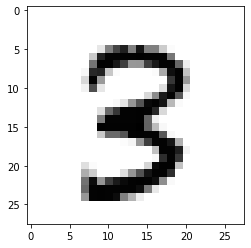

In [18]:
import matplotlib.pyplot as plt

with torch.no_grad(): # Don't Calculate Gradient
    x_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    y_test = mnist_test.test_labels.to(device)

    pred = model(x_test)
    correct_pred = torch.argmax(pred, 1) == y_test
    acc = correct_pred.float().mean()
    print('Accuracy:',acc.item())

    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()